In [1]:
# import
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import altair as alt
import warnings
import streamlit as st
from keras.layers import Dense, Activation
from keras.models import Sequential
from tensorflow import keras
from sklearn.cluster import KMeans
# folium
import folium
import folium.plugins as plugins
from streamlit_folium import folium_static

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# NLP
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import string

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file
%matplotlib inline

# this line makes plots prettier on mac retina screens - if you don't have one it shouldn't do anything
%config InlineBackend.figure_format = 'retina'


# Style
sns.set_style(style = 'darkgrid')









font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}

plt.rc('font', **font)


# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [44]:
import pandas as pd
import glob
import os

files = os.path.join("/Users/hitomihoshino/Documents/DS/salesforce/japan","scrape_en*.csv")
files = glob.glob(files)

df = pd.concat(map(pd.read_csv, files), ignore_index=True)

df.to_csv('review_en.csv')

df = pd.read_csv('review_en.csv')

In [45]:
df.drop_duplicates(inplace = True)

In [46]:
df.isna().sum()

Unnamed: 0            0
タイトル                101
タイトルリンク             101
typography-hy         0
point               198
w-100                 0
口コミ投稿日                0
text-center           0
report                0
report1               0
Unnamed: 0.1        361
Unnamed: 0.1.1      361
Unnamed: 0.1.1.1    461
dtype: int64

In [47]:
df.columns

Index(['Unnamed: 0', 'タイトル', 'タイトルリンク', 'typography-hy', 'point', 'w-100',
       '口コミ投稿日', 'text-center', 'report', 'report1', 'Unnamed: 0.1',
       'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1'],
      dtype='object')

In [48]:
df.drop(['Unnamed: 0','タイトルリンク', 'report', 'report1', 'Unnamed: 0.1',
       'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1', 'text-center'], axis = 1, inplace = True)

In [49]:
df.shape

(686, 5)

In [50]:
df.columns

Index(['タイトル', 'typography-hy', 'point', 'w-100', '口コミ投稿日'], dtype='object')

In [51]:
df.head(1)

,タイトル,typography-hy,point,w-100,口コミ投稿日
0,男性/ 営業/ 現職（回答時）/ 中途入社/ 在籍3年未満/ 正社員,働き方（勤務時間・休日休暇・制度）,4.7,勤務時間・休日休暇:ワークライフバランスをとるかどうかは自分次第。ベースとなる勤務時間は9：...,2022年03月 6日


In [52]:
df.rename(columns = {'タイトル': 'reviewer_info', 
                     'typography-hy': 'title', 
                     'point' : 'rating', 
                     'w-100': 'review', 
                     '口コミ投稿日': 'date',
                    }, inplace = True)

In [53]:
df.dtypes

reviewer_info     object
title             object
rating           float64
review            object
date              object
dtype: object

In [54]:
df.isna().sum()

reviewer_info    101
title              0
rating           198
review             0
date               0
dtype: int64

In [55]:
df.head(1)

,reviewer_info,title,rating,review,date
0,男性/ 営業/ 現職（回答時）/ 中途入社/ 在籍3年未満/ 正社員,働き方（勤務時間・休日休暇・制度）,4.7,勤務時間・休日休暇:ワークライフバランスをとるかどうかは自分次第。ベースとなる勤務時間は9：...,2022年03月 6日


### Filling NaN values in ratting col with the mean of around 4.5

In [56]:
df['rating'].unique()
df['rating'].replace(np.nan, 4.5, inplace = True)

<AxesSubplot:>

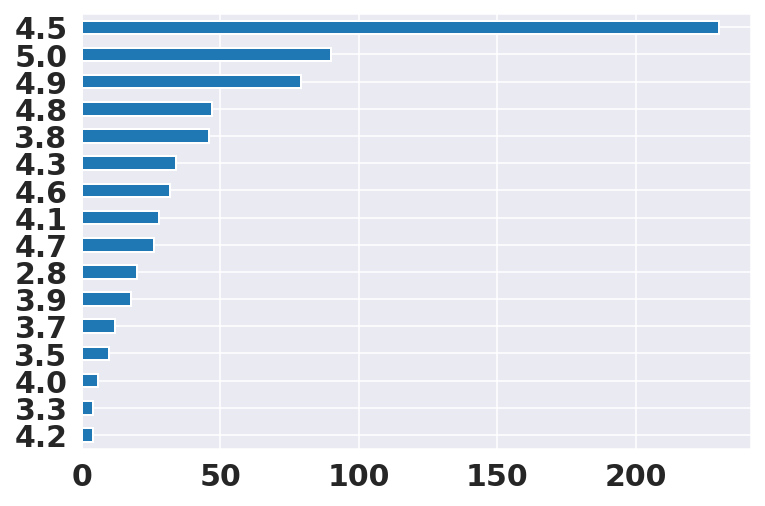

In [57]:
df['rating'].value_counts().sort_values().plot(kind = 'barh')

In [58]:
df['title'].unique()

array(['働き方（勤務時間・休日休暇・制度）', '年収・給与', '企業カルチャー・組織体制', '福利厚生・オフィス環境',
       '事業展望・強み・弱み', '入社前とのギャップ', '女性の働きやすさ', '成長・働きがい'], dtype=object)

In [59]:
# df['column name'] = df['column name'].replace(['old value'],'new value')
df['title'] = df['title'].replace(['働き方（勤務時間・休日休暇・制度）'], 'Work style (working hours/holidays/systems)')
df['title'] = df['title'].replace(['年収・給与'], 'Annual salary/salary')
df['title'] = df['title'].replace(['企業カルチャー・組織体制'], 'Corporate culture/organizational system')
df['title'] = df['title'].replace(['福利厚生・オフィス環境'], 'Benefits/office environment')
df['title'] = df['title'].replace(['事業展望・強み・弱み'], 'Business prospects/strengths/weaknesses')
df['title'] = df['title'].replace(['入社前とのギャップ'], 'Gap before joining the company')
df['title'] = df['title'].replace(['女性の働きやすさ'], 'working for women')
df['title'] = df['title'].replace(['成長・働きがい'], 'Growth/motivation')

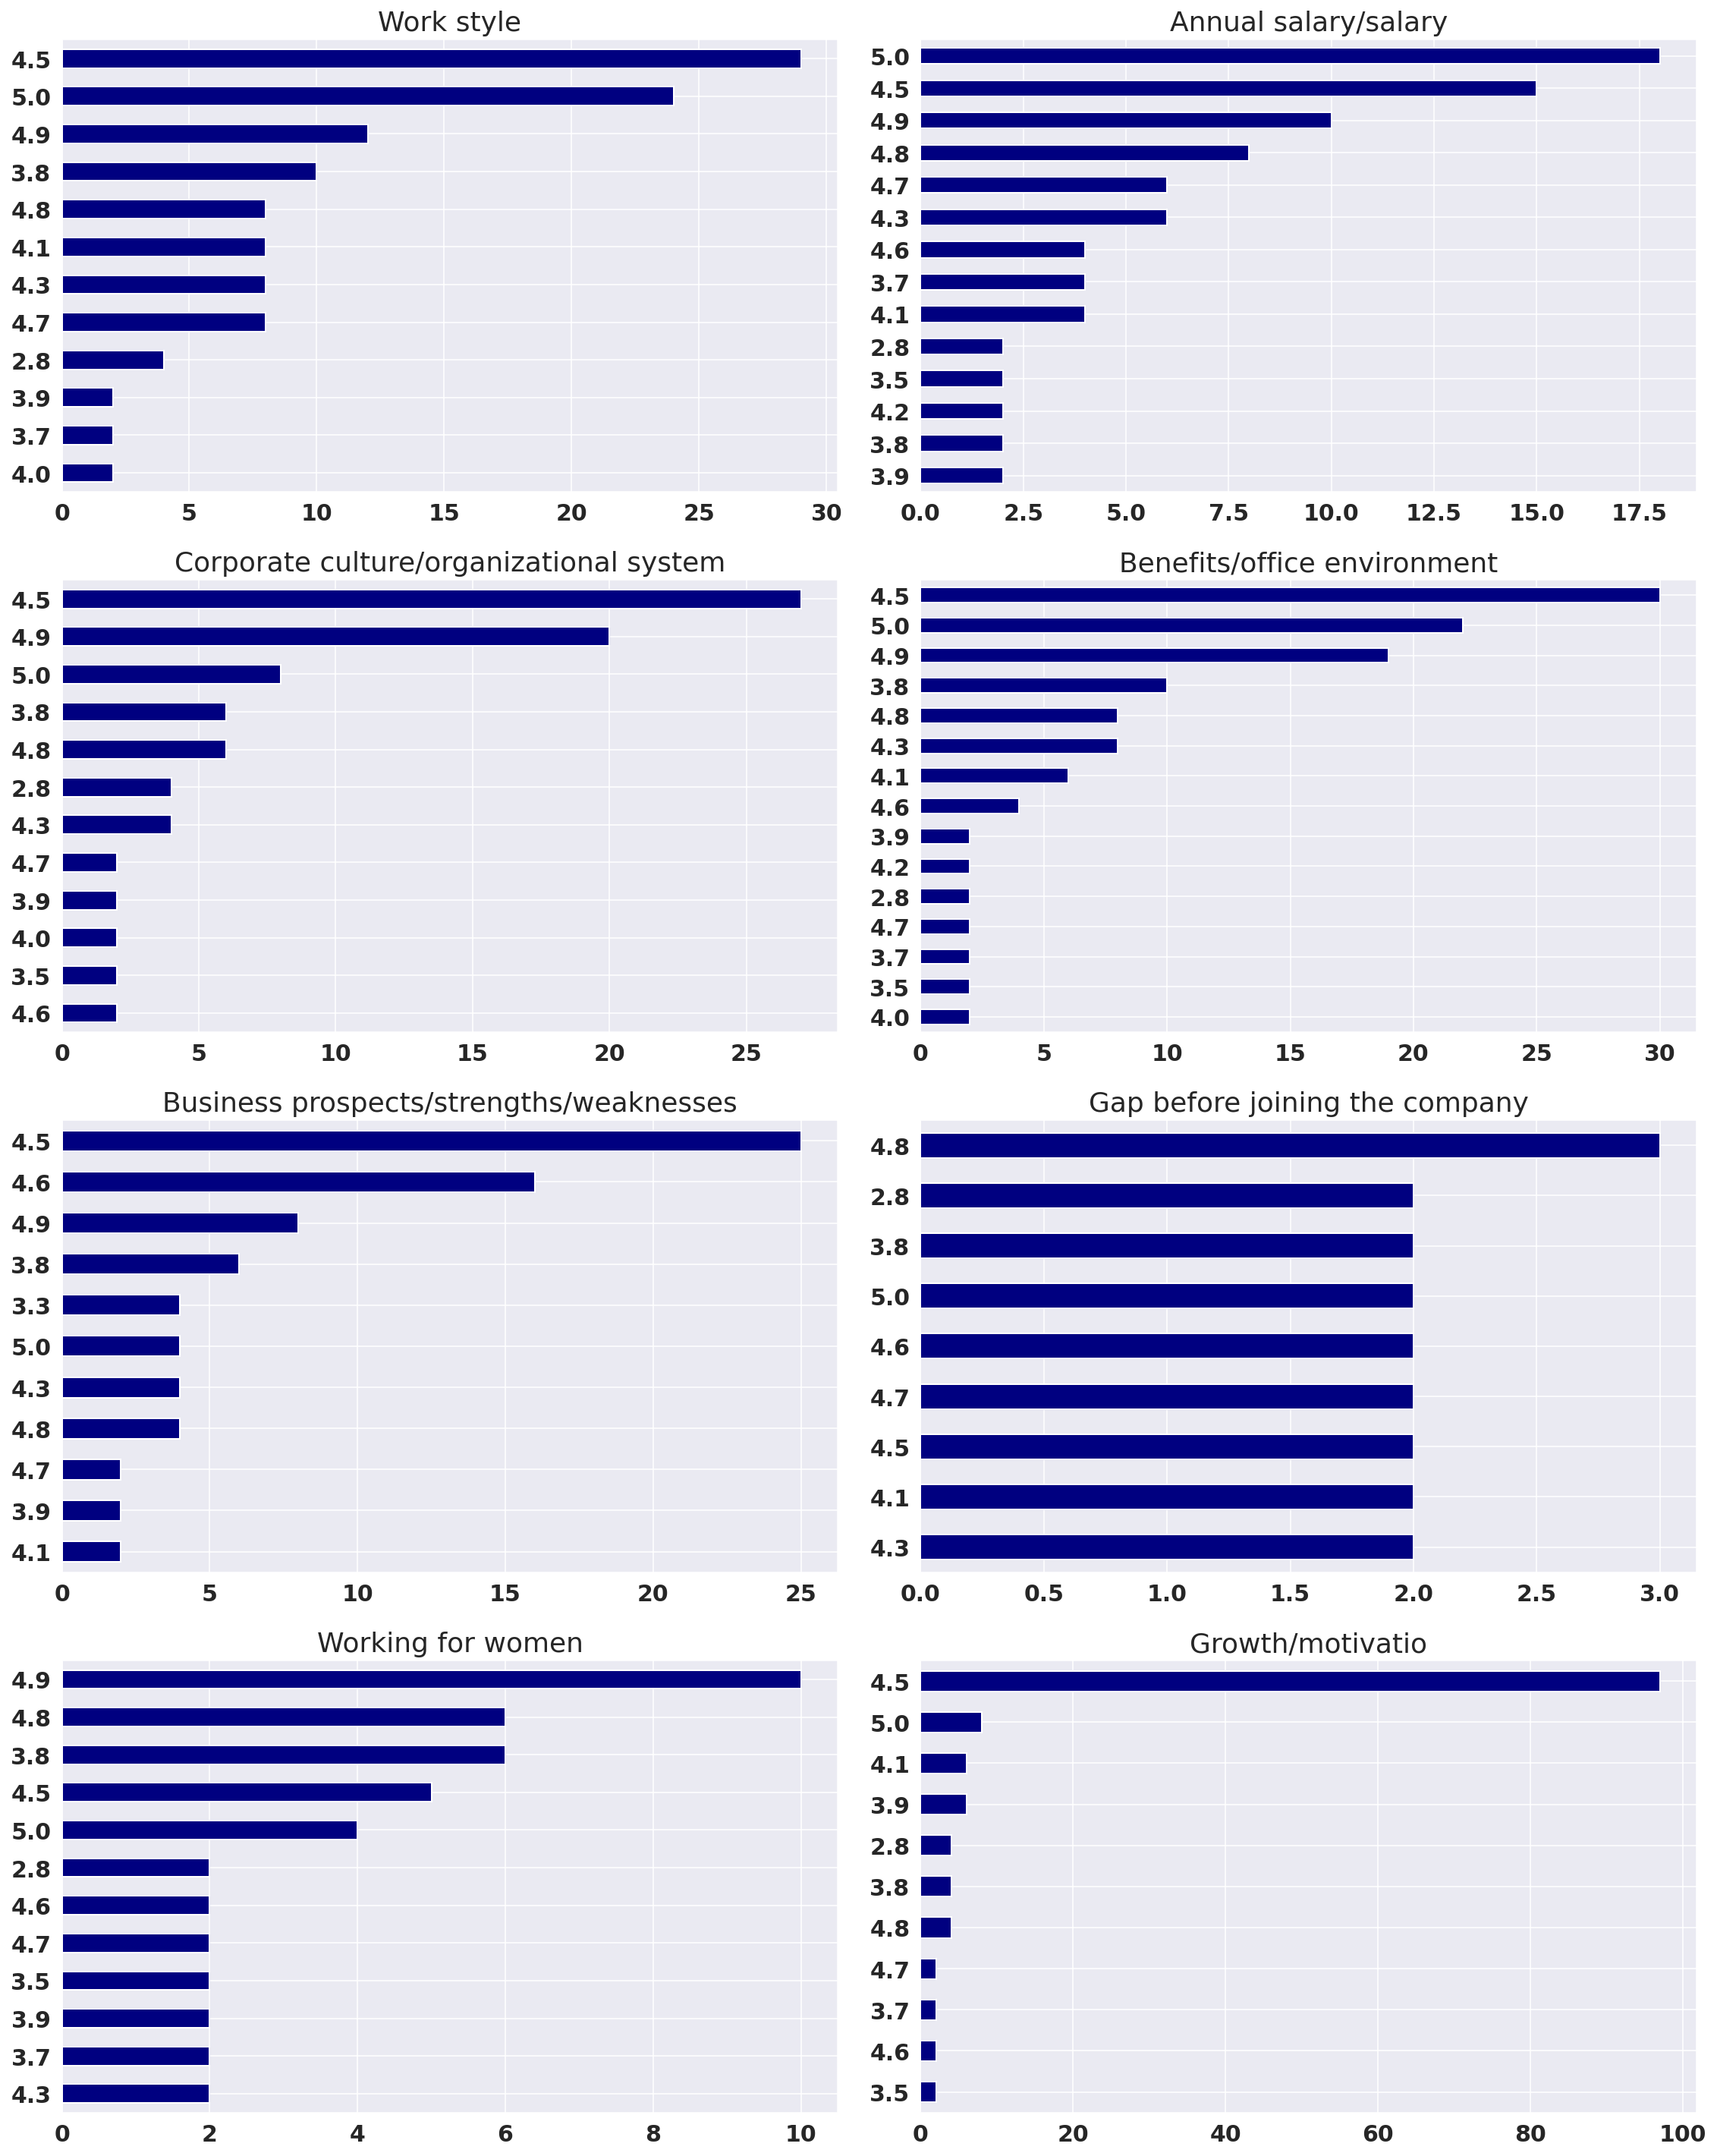

In [60]:
fig, ax = plt.subplots(4,2, figsize=(16,20))

work_balance = df[df['title'] == 'Work style (working hours/holidays/systems)']
work_balance['rating'].value_counts().sort_values().plot(kind = 'barh', color='navy', ax=ax[0][0], title='Work style')

salary = df[df['title'] == 'Annual salary/salary']
salary['rating'].value_counts().sort_values().plot(kind = 'barh', color='navy', ax=ax[0][1], title='Annual salary/salary')

culture = df[df['title'] == 'Corporate culture/organizational system']
culture['rating'].value_counts().sort_values().plot(kind = 'barh', color='navy', ax=ax[1][0], title='Corporate culture/organizational system')

benefit = df[df['title'] == 'Benefits/office environment']
benefit['rating'].value_counts().sort_values().plot(kind = 'barh', color='navy', ax=ax[1][1], title='Benefits/office environment')

business = df[df['title'] == 'Business prospects/strengths/weaknesses']
business['rating'].value_counts().sort_values().plot(kind = 'barh', color='navy', ax=ax[2][0], title='Business prospects/strengths/weaknesses')

gap = df[df['title'] == 'Gap before joining the company']
gap['rating'].value_counts().sort_values().plot(kind = 'barh', color='navy', ax=ax[2][1], title='Gap before joining the company')

women = df[df['title'] == 'working for women']
women['rating'].value_counts().sort_values().plot(kind = 'barh', color='navy', ax=ax[3][0], title='Working for women')

motivation = df[df['title'] == 'Growth/motivation']
motivation['rating'].value_counts().sort_values().plot(kind = 'barh', color='navy', ax=ax[3][1], title='Growth/motivatio')

fig.tight_layout()
plt.show()

In [61]:
df.columns

Index(['reviewer_info', 'title', 'rating', 'review', 'date'], dtype='object')

In [62]:
df.head(2)

,reviewer_info,title,rating,review,date
0,男性/ 営業/ 現職（回答時）/ 中途入社/ 在籍3年未満/ 正社員,Work style (working hours/holidays/systems),4.7,勤務時間・休日休暇:ワークライフバランスをとるかどうかは自分次第。ベースとなる勤務時間は9：...,2022年03月 6日
1,男性/ 営業/ 現職（回答時）/ 中途入社/ 在籍3年未満/ 正社員,Work style (working hours/holidays/systems),4.7,勤務時間・休日休暇:ワークライフバランスを保てるかどうかは自分次第。強制的に残業や休日の仕事...,2021年02月23日


In [63]:
df.review

0      勤務時間・休日休暇:ワークライフバランスをとるかどうかは自分次第。ベースとなる勤務時間は9：...
1      勤務時間・休日休暇:ワークライフバランスを保てるかどうかは自分次第。強制的に残業や休日の仕事...
2      給与制度:提示される想定年収の8割が固定給で残り2割がインセンティブインセンティブは四半期ご...
3      企業カルチャー・社風:カスタマーサクセスを打ち出しており、導入後も運用をサポートする部門が支...
4      福利厚生:オフィス内のカフェテリアは充実している。エスプレッソマシンは自動であるが、豆もそれ...
                             ...                        
681    企業文化・社風・組織体制：【社員のモチベーションの高さ】自分の業務に関してはとても関心が高く...
682    成長・キャリア開発：【自身の目標となる同僚・上司の有無】直属の上司がとても出来る人なので、ひ...
683    成長・キャリア開発：【プレゼンや商談など考えを伝える機会の有無】はい、チーム内、部内、多部署...
684    成長・キャリア開発：【業務の効率化を求められる環境か】はい。とにかく多くのプロジェクトを同時...
685         入社時の期待と入社後のギャップ:内部のシステム面などは思ったよりも遅れている感じがする。
Name: review, Length: 686, dtype: object

In [64]:
df.head(2)

,reviewer_info,title,rating,review,date
0,男性/ 営業/ 現職（回答時）/ 中途入社/ 在籍3年未満/ 正社員,Work style (working hours/holidays/systems),4.7,勤務時間・休日休暇:ワークライフバランスをとるかどうかは自分次第。ベースとなる勤務時間は9：...,2022年03月 6日
1,男性/ 営業/ 現職（回答時）/ 中途入社/ 在籍3年未満/ 正社員,Work style (working hours/holidays/systems),4.7,勤務時間・休日休暇:ワークライフバランスを保てるかどうかは自分次第。強制的に残業や休日の仕事...,2021年02月23日


In [65]:
from googletrans import Translator
tr = Translator(service_urls=['translate.googleapis.com'])
tr = Translator()
tr.translate(text="こんにちは", src="ja", dest="en").text

'hello'

In [66]:
df['review_translated'] = df['review'].apply(lambda x : tr.translate(x, src="ja", dest="en").text)

In [67]:
df['reviwe_translated_original'] = df['review_translated']

In [68]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from textblob import TextBlob
from textblob import Word
import re,string,unicodedata

## Tokenizer

In [69]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

## Remove special Chars

In [70]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
df['review_translated']=df['review_translated'].apply(remove_special_characters)

## Text Stemming

In [71]:
# #Stemming the text
# def simple_stemmer(text):
#     ps=nltk.porter.PorterStemmer()
#     text= ' '.join([ps.stem(word) for word in text.split()])
#     return text
# #Apply function on review column
# df['Pros']=df['Pros'].apply(simple_stemmer)

## Lemmatization

In [72]:
lemmatizer = nltk.stem.WordNetLemmatizer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]


#Apply function on review column
df['review_translated']=df['review_translated'].apply(lemmatize_text)

In [73]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
df['review_translated']=df['review_translated'].apply(remove_stopwords)

{'what', 'shan', 'where', 'some', 'their', 'whom', 'under', 'she', 'of', 'were', 'below', 'wasn', "weren't", 'our', "didn't", 'won', 'during', 'down', 'out', "you'd", "don't", "haven't", 'mustn', 'not', 'isn', 'over', 'itself', 'will', 'up', 'that', "hasn't", 't', 'when', "aren't", 'doing', "hadn't", 'herself', 'while', 'ain', 'at', 'same', 'hers', 'can', 'through', 'are', 'is', 'his', "shouldn't", 'before', 'you', 'yourselves', 'wouldn', 'no', 'with', 'further', "mightn't", "wouldn't", "she's", 'nor', 'its', 'should', 'own', 'mightn', 'they', 'such', 'ourselves', 'after', 'those', 'this', 'how', 'all', 'shouldn', 's', 'so', 'couldn', 'any', 'only', 'he', 'don', "doesn't", 'have', 'these', 'an', 're', 'didn', 'myself', 'to', 'm', 'which', 'me', "wasn't", 'we', 'yours', 'who', 'both', "it's", 'from', 'most', 'yourself', "you'll", 'him', 'do', 'just', 'was', 'them', 'but', 'very', 'or', 'himself', 'more', 'my', "mustn't", 'few', 'been', 'other', "couldn't", 'by', 'doesn', 'd', 'into', 'l

/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Figure(2160x2160)


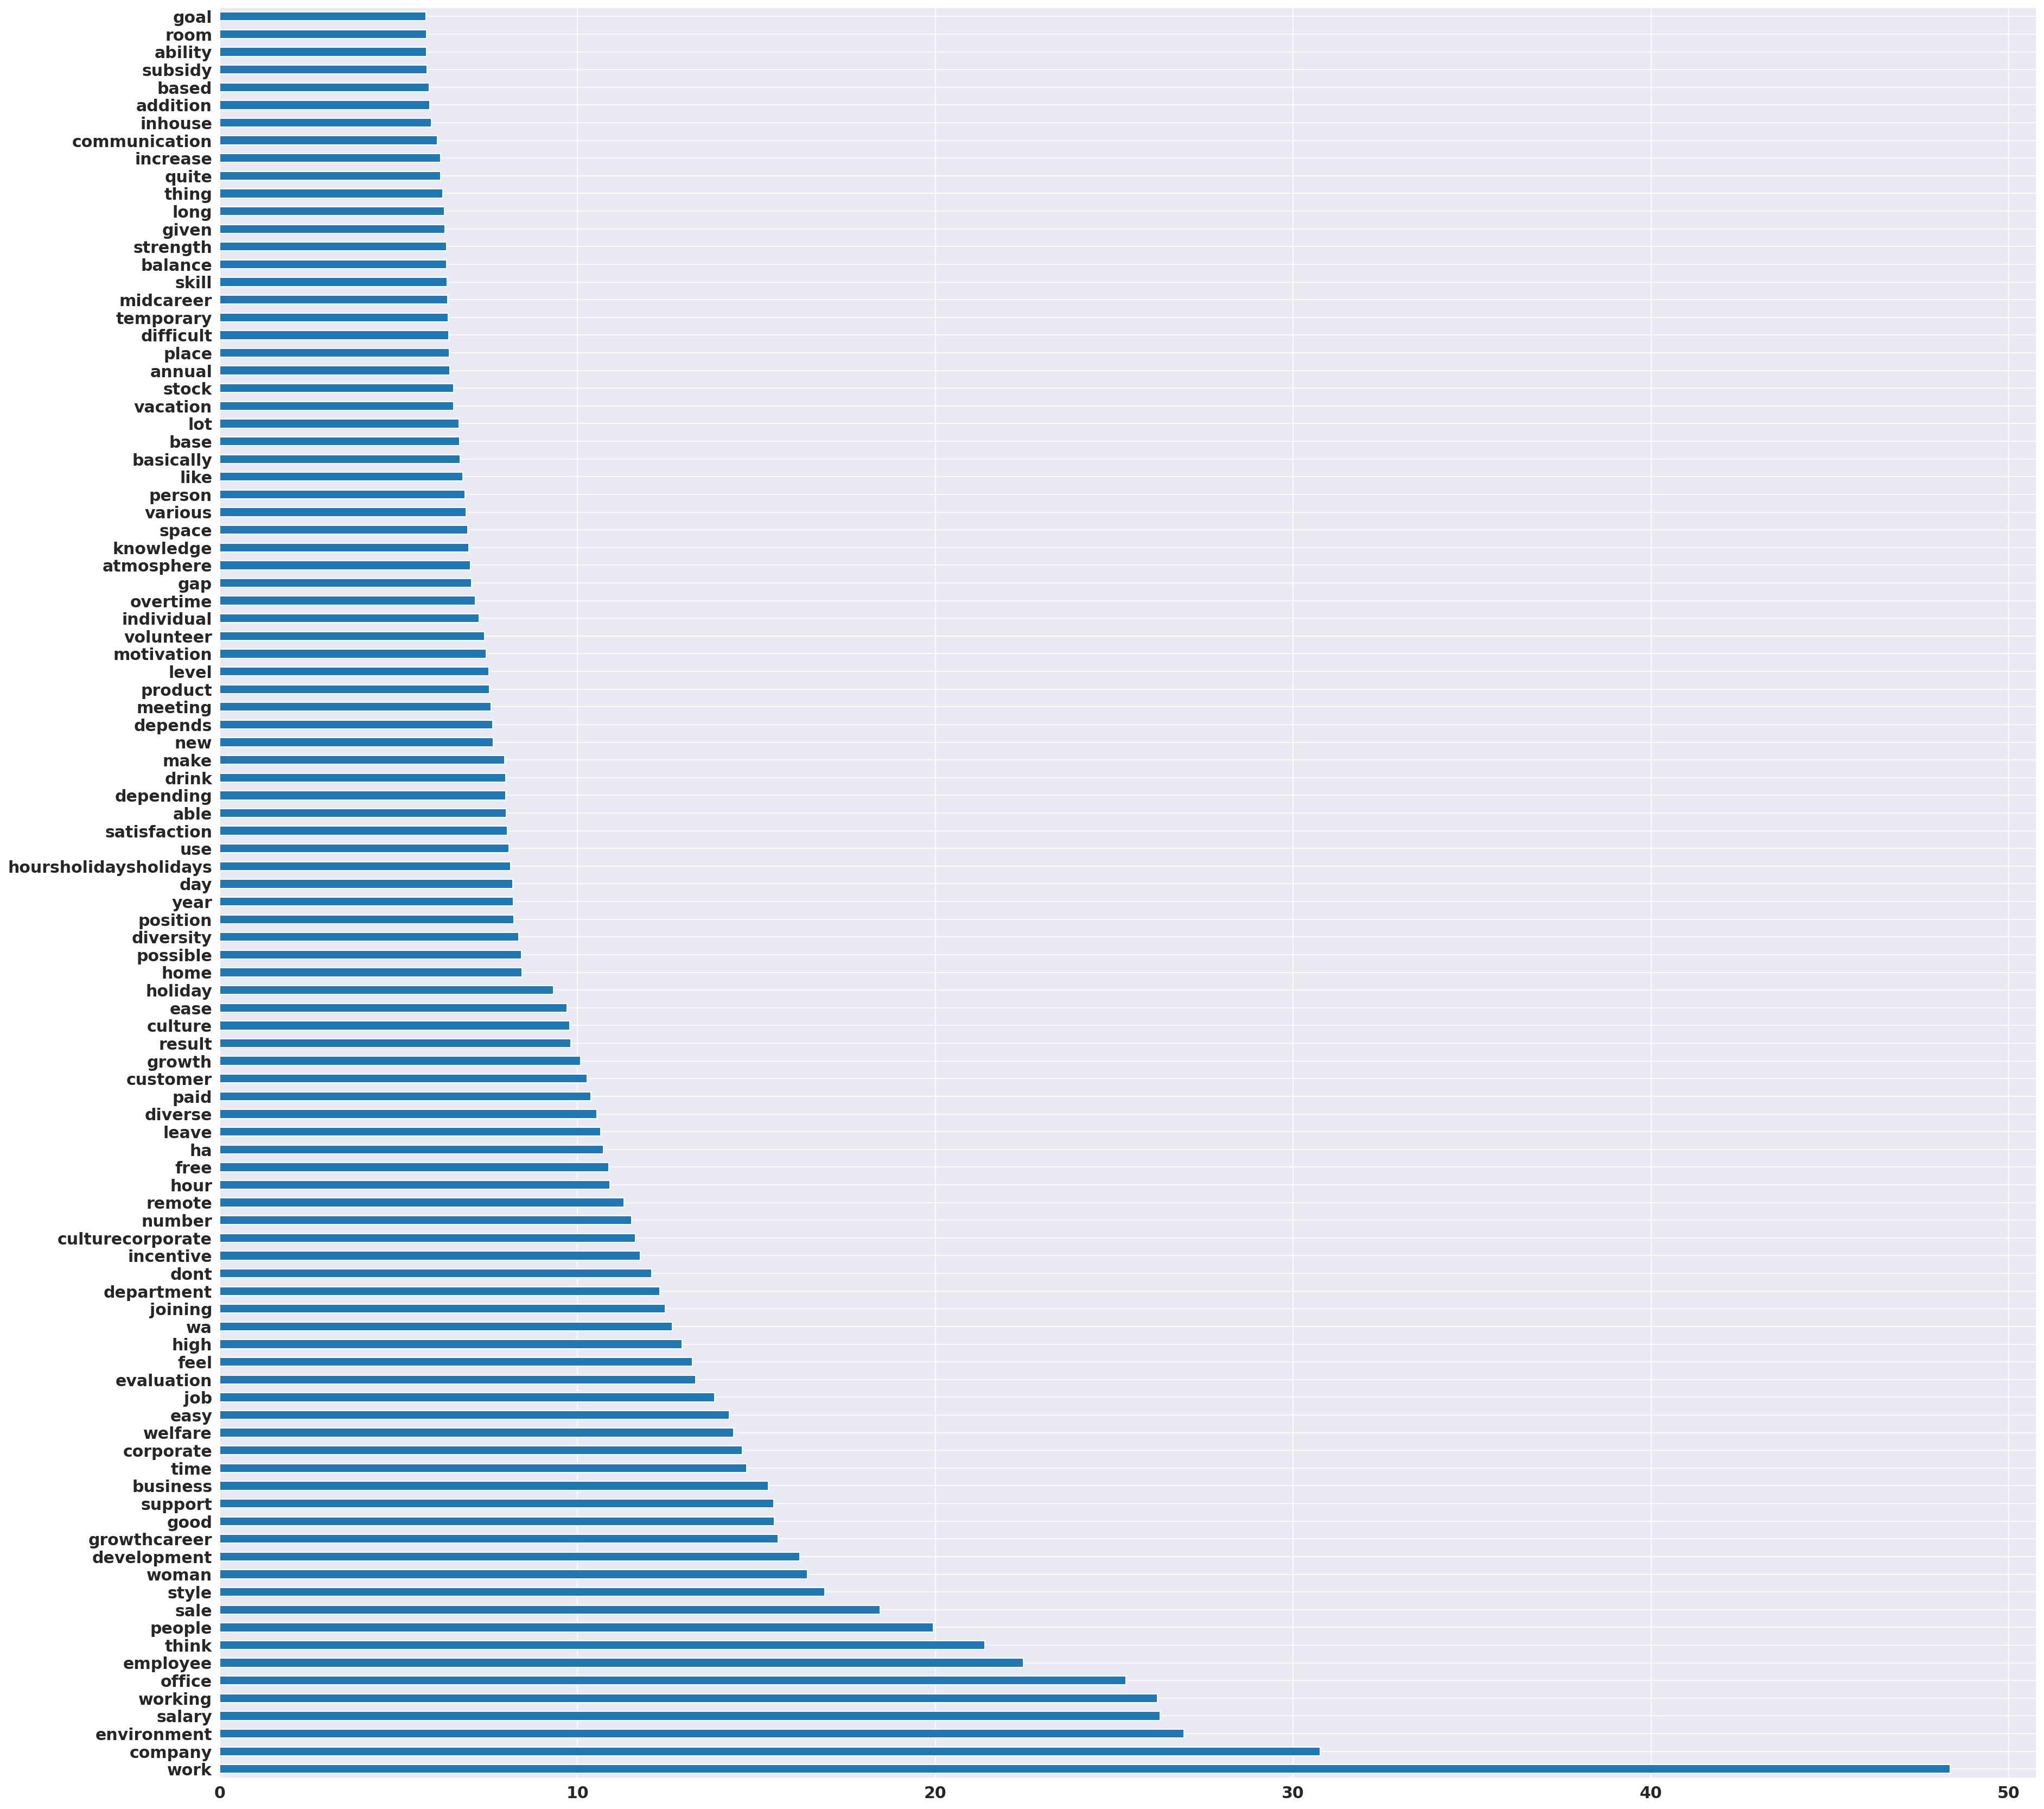

In [74]:
tf = TfidfVectorizer(stop_words='english', min_df=3)
tf.fit(df['review_translated'])

pro_tf = tf.transform(df['review_translated'])
pro_df = pd.DataFrame(pro_tf.todense(), columns=tf.get_feature_names())



fig, ax = plt.subplots(figsize = (30,30))
top_texts = pro_df.sum().sort_values(ascending=False)
top_texts.head(100).plot(kind='barh')
print(fig)

In [75]:
# df[df['review_translated'].str.contains('remote')]

/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Figure(2160x2160)


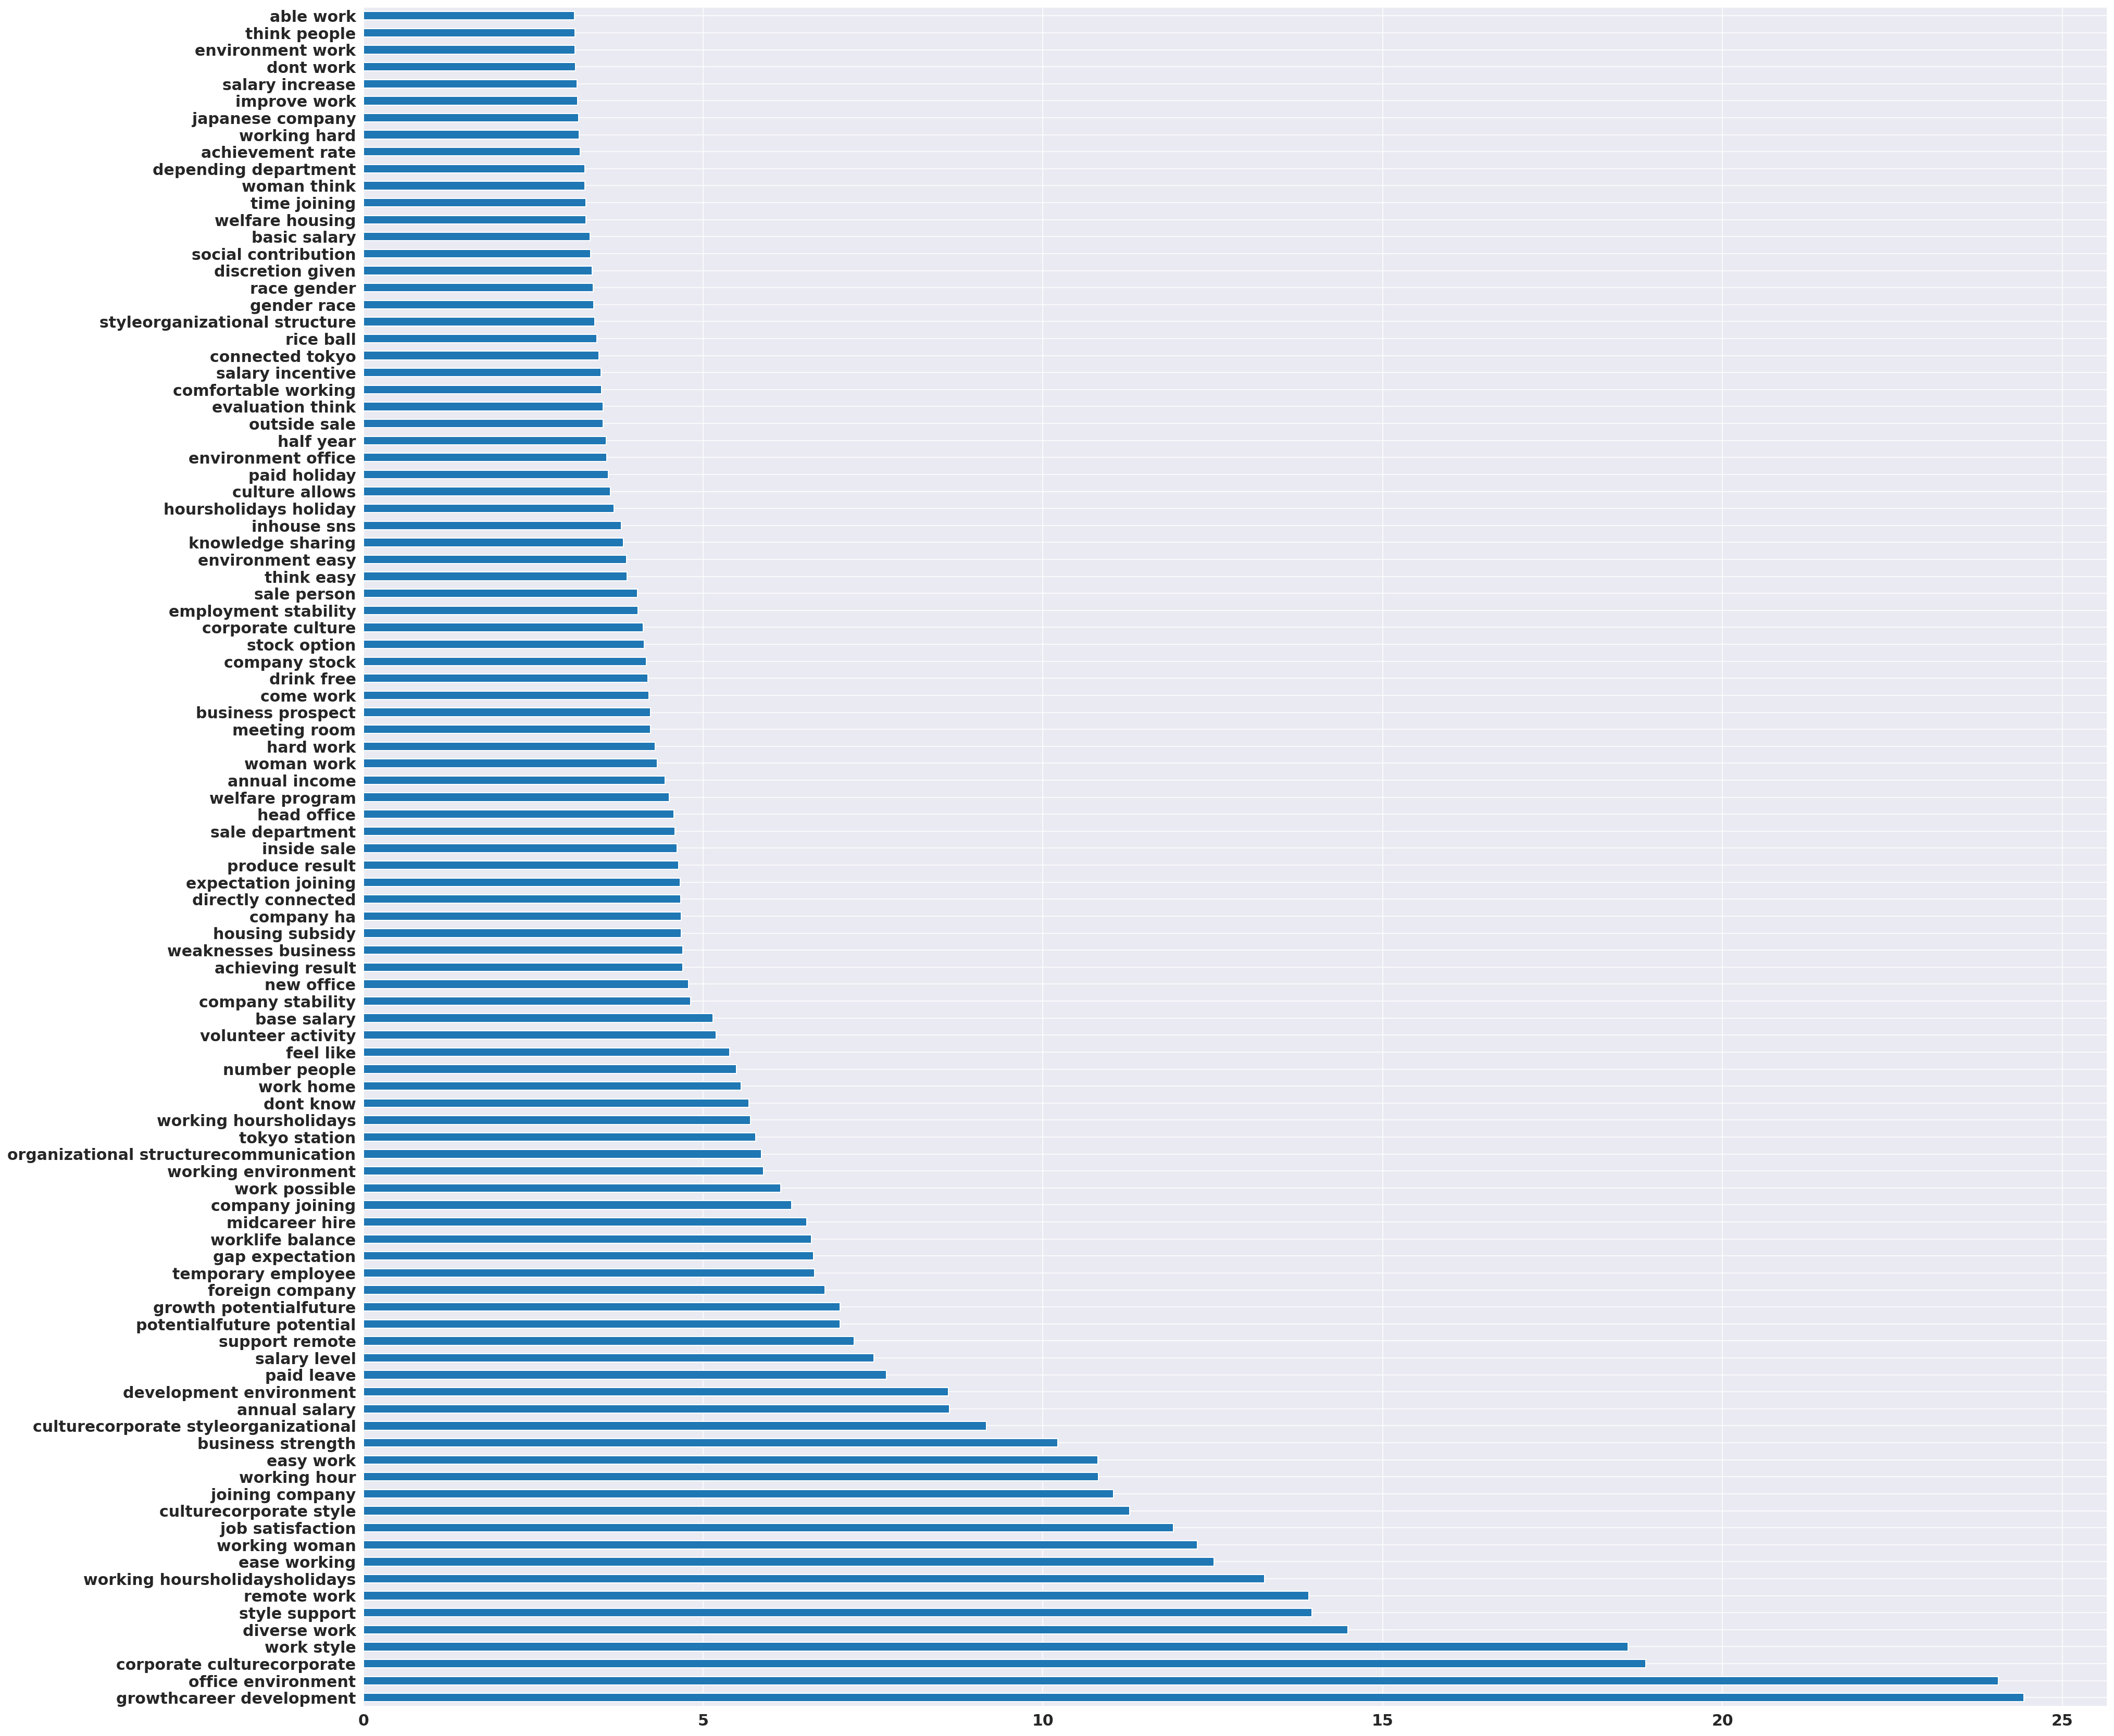

In [76]:
tf = TfidfVectorizer(stop_words='english', min_df=3, ngram_range= (2,2))
tf.fit(df['review_translated'])

pro_tf = tf.transform(df['review_translated'])
pro_df = pd.DataFrame(pro_tf.todense(), columns=tf.get_feature_names())



fig, ax = plt.subplots(figsize = (30,30))
top_texts = pro_df.sum().sort_values(ascending=False)
top_texts.head(100).plot(kind='barh')
print(fig)

/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Figure(2160x2160)


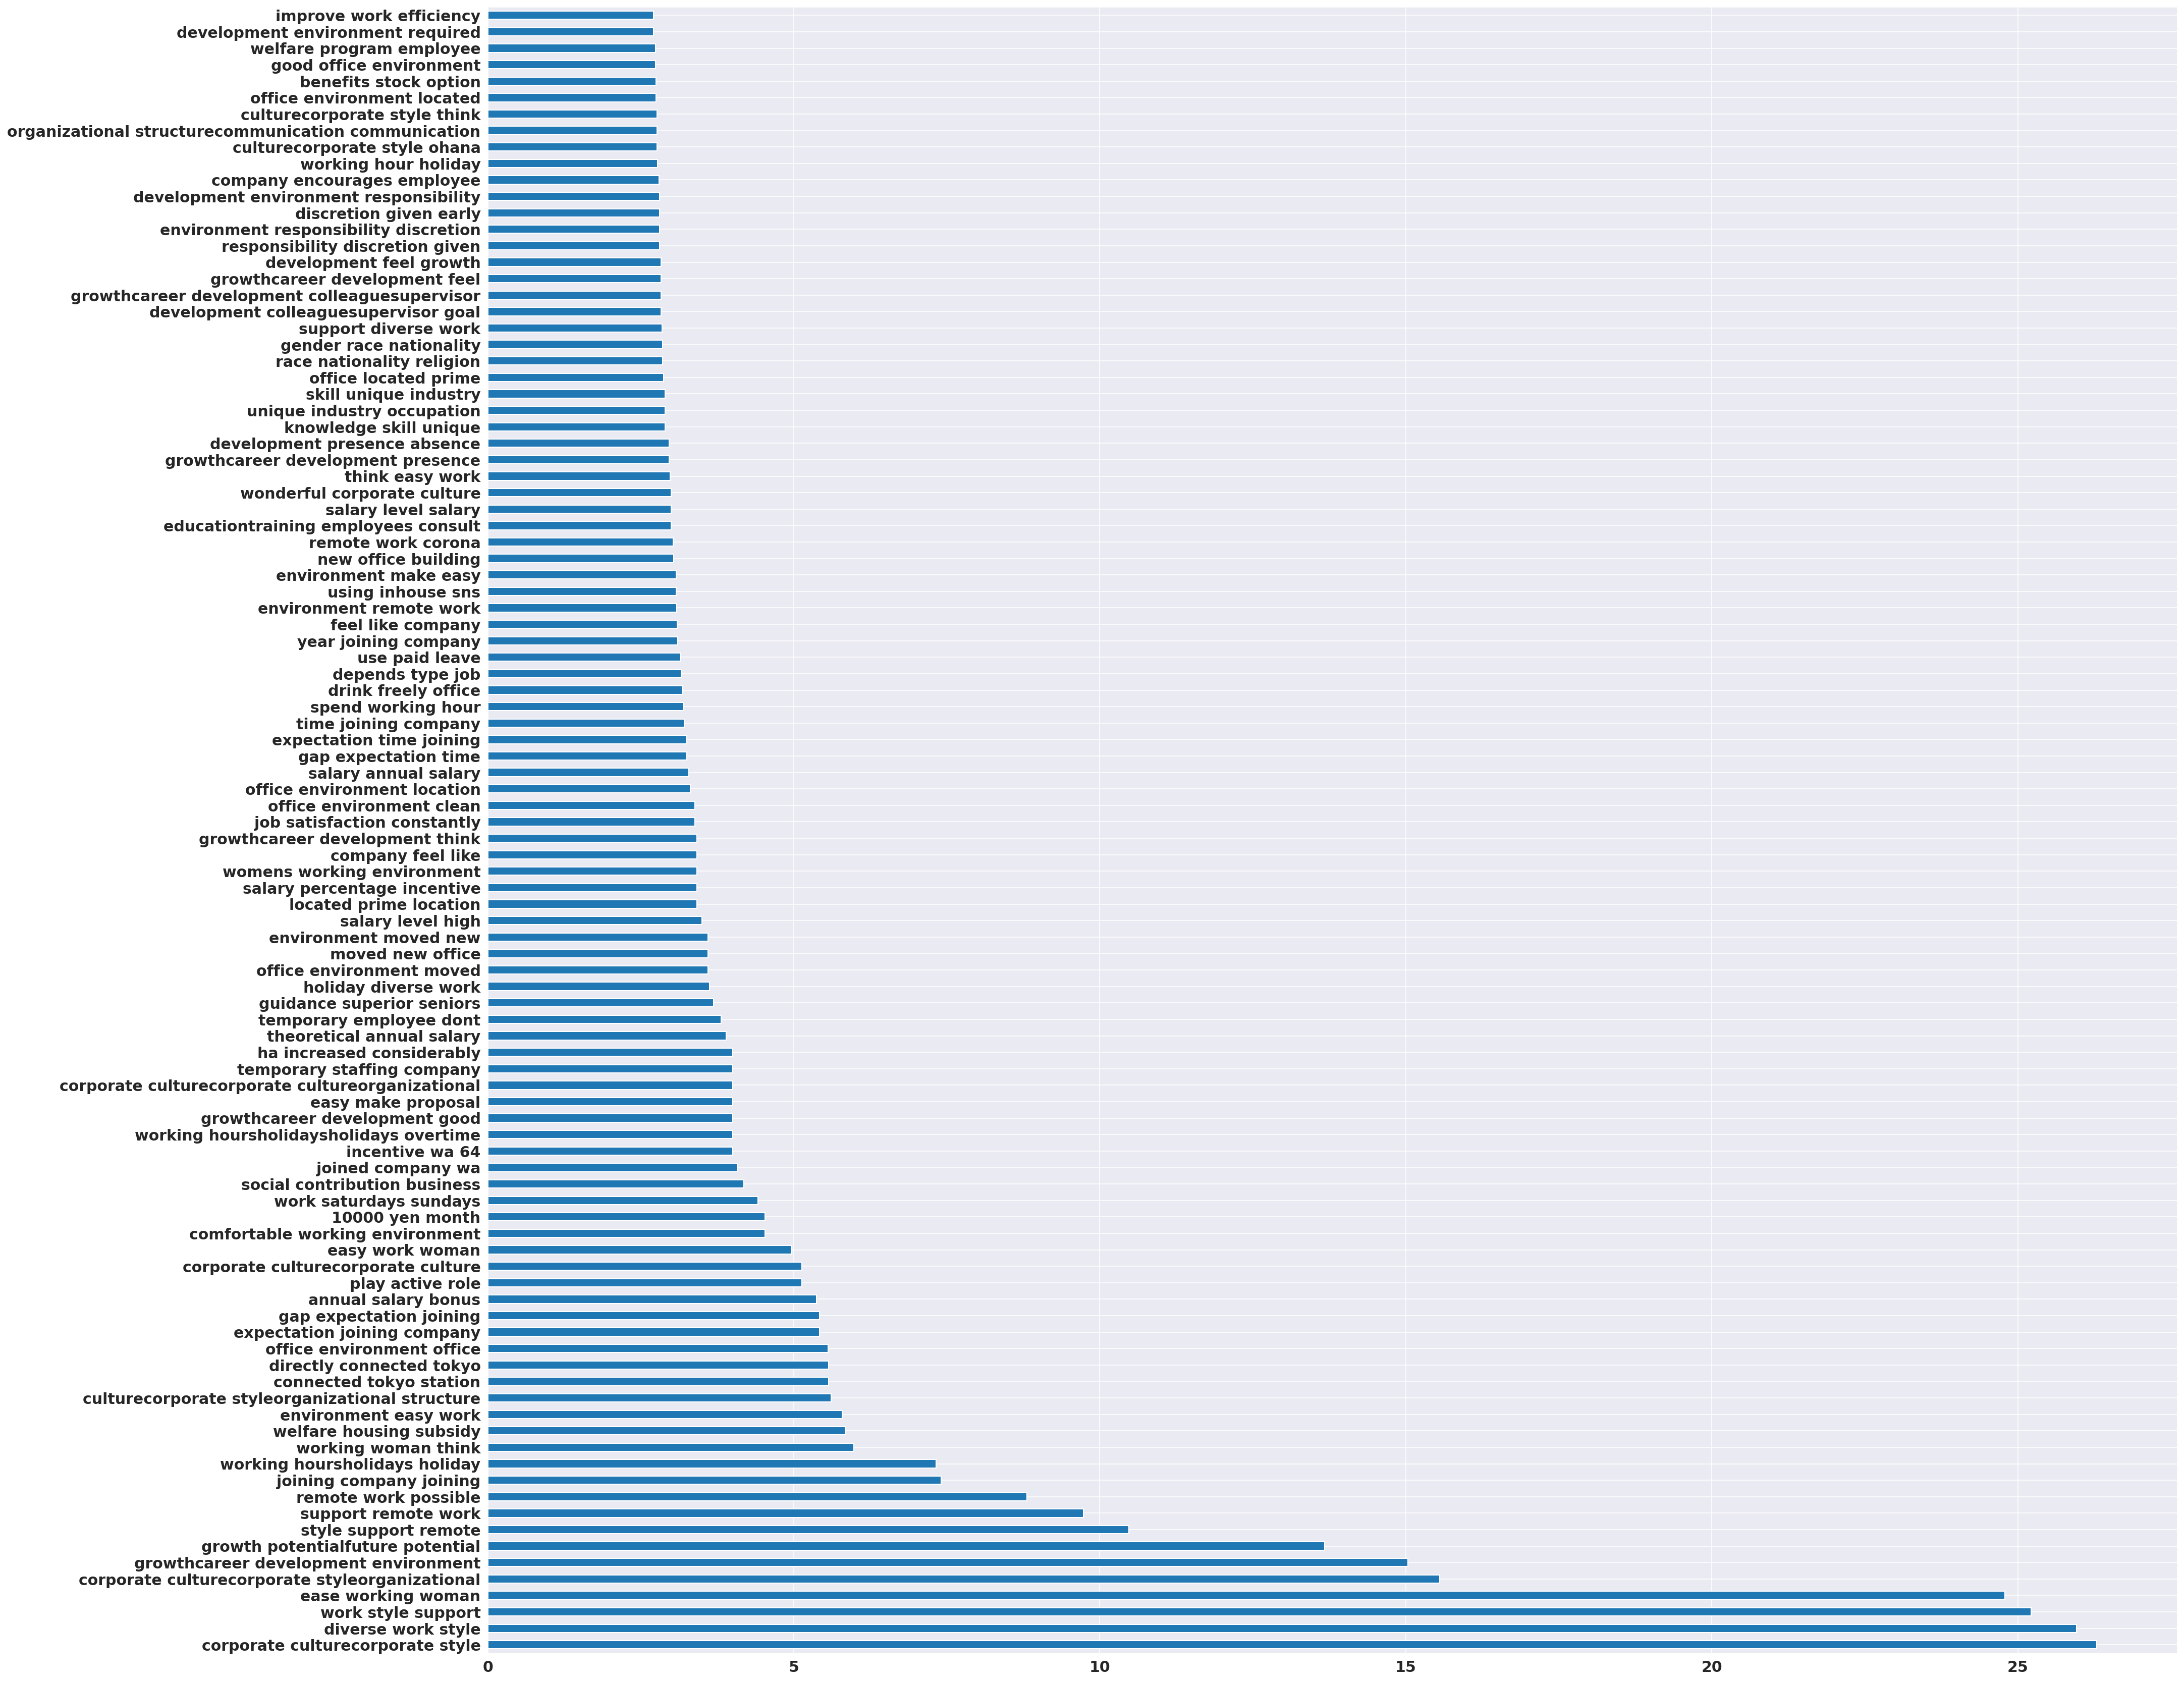

In [77]:
tf = TfidfVectorizer(stop_words='english', min_df=3, ngram_range= (3,3))
tf.fit(df['review_translated'])

pro_tf = tf.transform(df['review_translated'])
pro_df = pd.DataFrame(pro_tf.todense(), columns=tf.get_feature_names())



fig, ax = plt.subplots(figsize = (30,30))
top_texts = pro_df.sum().sort_values(ascending=False)
top_texts.head(100).plot(kind='barh')
print(fig)

In [78]:
df.to_csv('jp_nlp_cleaned.csv')

# Japanese NLP

In [37]:
li = df.review.tolist()

In [38]:
import sentencepiece as spm
from sentencepiece import SentencePieceTrainer
from sentencepiece import SentencePieceProcessor

In [39]:
with open('text.txt', 'w') as f:
    f.write(str(li))

In [40]:
import nltk
from nltk.corpus.reader import *
from nltk.corpus.reader.util import *
from nltk.text import Text

In [41]:
jp_sent_tokenizer = nltk.RegexpTokenizer(u'[^　「」！？。]*[！？。]')

In [42]:
jp_chartype_tokenizer = nltk.RegexpTokenizer(u'([ぁ-んー]+|[ァ-ンー]+|[\u4e00-\u9FFF]+|[^ぁ-んァ-ンー\u4e00-\u9FFF]+)')

In [43]:
nlp = PlaintextCorpusReader( '/Users/hitomihoshino/Documents/DS/salesforce', r'text.txt',
                               encoding='utf-8',
                               para_block_reader=read_line_block,
                               sent_tokenizer=jp_sent_tokenizer,
                               word_tokenizer=jp_chartype_tokenizer)